# Plot: Dependence on Break Locations with Weighted Loss

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl

In [3]:
path = 'C:/Users/Meier/Institut für Statistik Dropbox/Johanna Meier/Structural Breaks + DL/Figures/' 

In [4]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Load data:

In [10]:
with np.load(path+'Results/Plot_RNN_preds.npz') as data: # equal weights
    rnn_preds_mean = data['mean']
    rnn_preds_std = data['std']
with np.load(path+'Results/Plot_RNN_exponential_0.01_preds.npz') as data: # exponential, alpha = 0.01, batch_size = 128
    rnn_exp_preds_mean = data['mean']
    rnn_exp_preds_std = data['std']
with np.load(path+'Results/Plot_RNN_rayleigh_5e-05_preds.npz') as data: # rayleigh, alpha = 5*10^(-5), batch_size = 128
    rnn_ray_preds_mean = data['mean']
    rnn_ray_preds_std = data['std']
with np.load(path+'Results/Plot_RNN_bartlett_T0.95_preds.npz') as data: # bartlett, alpha = T^0.95, batch_size = 128
    rnn_bar_preds_mean = data['mean']
    rnn_bar_preds_std = data['std']
with np.load(path+'Results/Plot_RNN_parzen_T0.95_preds.npz') as data: # parzen, alpha = T^0.95, batch_size = 128
    rnn_par_preds_mean = data['mean']
    rnn_par_preds_std = data['std']
with np.load(path+'Results/Plot_RNN_tukey-hanning_T0.95_preds.npz') as data: # tukey-hanning, alpha = T^0.95, batch_size = 128
    rnn_tuk_preds_mean = data['mean']
    rnn_tuk_preds_std = data['std']

In [11]:
tau = np.arange(0,1,0.05)
y1 = np.zeros(rnn_exp_preds_mean.shape[0])
y2 = 0.5*np.ones(rnn_exp_preds_mean.shape[0])

In [16]:
# varying alpha
# smaller alpha
with np.load(path+'Results/Plot_RNN_exponential_0.005_preds.npz') as data: # exponential, alpha = 0.005, batch_size = 128
    rnn_exp_preds_mean_small = data['mean']
    rnn_exp_preds_std_small = data['std']
with np.load(path+'Results/Plot_RNN_rayleigh_2e-05_preds.npz') as data: # rayleigh, alpha = 2*10^(-5), batch_size = 128
#with np.load(path+'Results/Plot_RNN_rayleigh_1e-05_preds.npz') as data: # rayleigh, alpha = 1*10^(-5), batch_size = 128
    rnn_ray_preds_mean_small = data['mean']
    rnn_ray_preds_std_small = data['std']
with np.load(path+'Results/Plot_RNN_bartlett_T0.9_preds.npz') as data: # bartlett, alpha = T^0.9, batch_size = 128
    rnn_bar_preds_mean_small = data['mean']
    rnn_bar_preds_std_small = data['std']
with np.load(path+'Results/Plot_RNN_parzen_T0.9_preds.npz') as data: # parzen, alpha = T^0.9, batch_size = 128
    rnn_par_preds_mean_small = data['mean']
    rnn_par_preds_std_small = data['std']
with np.load(path+'Results/Plot_RNN_tukey-hanning_T0.9_preds.npz') as data: # tukey-hanning, alpha = T^0.9, batch_size = 128
    rnn_tuk_preds_mean_small = data['mean']
    rnn_tuk_preds_std_small = data['std']
# larger alpha
with np.load(path+'Results/Plot_RNN_exponential_0.02_preds.npz') as data: # exponential, alpha = 0.02, batch_size = 128
    rnn_exp_preds_mean_large = data['mean']
    rnn_exp_preds_std_large = data['std']
with np.load(path+'Results/Plot_RNN_rayleigh_0.0001_preds.npz') as data: # rayleigh, alpha = 1*10^(-4), batch_size = 128
    rnn_ray_preds_mean_large = data['mean']
    rnn_ray_preds_std_large = data['std']
with np.load(path+'Results/Plot_RNN_bartlett_T1_preds.npz') as data: # bartlett, alpha = T^1, batch_size = 128
    rnn_bar_preds_mean_large = data['mean']
    rnn_bar_preds_std_large = data['std']
with np.load(path+'Results/Plot_RNN_parzen_T1_preds.npz') as data: # parzen, alpha = T^1, batch_size = 128
    rnn_par_preds_mean_large = data['mean']
    rnn_par_preds_std_large = data['std']
with np.load(path+'Results/Plot_RNN_tukey-hanning_T1_preds.npz') as data: # tukey-hanning, alpha = T^1, batch_size = 128
    rnn_tuk_preds_mean_large = data['mean']
    rnn_tuk_preds_std_large = data['std']

## RNN

Compare weighting schemes:

In [7]:
cmap1 = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("tab20c")

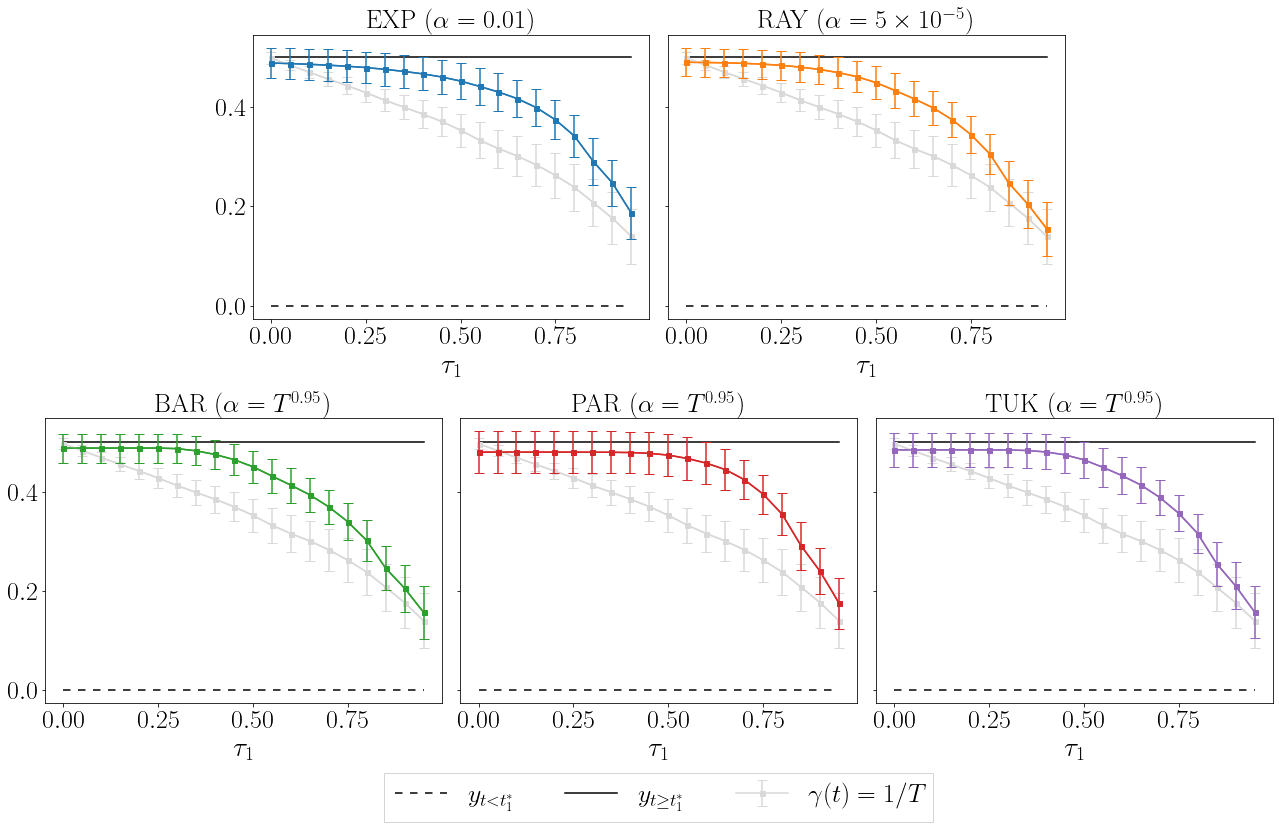

In [8]:
fig = plt.figure(figsize=(22,16))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax1.plot(tau, y2, color='black')
ax1.plot(tau, rnn_exp_preds_mean[:,0], color=cmap1(0))
ax1.errorbar(tau, rnn_exp_preds_mean[:,0], rnn_exp_preds_std[:,0], capsize=5, color=cmap1(0), marker='s', ms=5, zorder=3)
ax1.plot(tau, rnn_preds_mean[:,0], color=cmap2(19))
l3 = ax1.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax1.set_title('EXP ' + r'$(\alpha=0.01)$')
ax1.set_xlabel(r'$\tau_1$')

ax2.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax2.plot(tau, y2, color='black')
ax2.plot(tau, rnn_ray_preds_mean[:,0], color=cmap1(1))
ax2.errorbar(tau, rnn_ray_preds_mean[:,0], rnn_ray_preds_std[:,0], capsize=5, color=cmap1(1), marker='s', ms=5, zorder=3)
ax2.plot(tau, rnn_preds_mean[:,0], color=cmap2(19))
ax2.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax2.set_title('RAY ' + r'$(\alpha=5\times10^{-5})$')
ax2.set_xlabel(r'$\tau_1$')

ax3.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax3.plot(tau, y2, color='black')
ax3.plot(tau, rnn_bar_preds_mean[:,0], color=cmap1(2))
ax3.errorbar(tau, rnn_bar_preds_mean[:,0], rnn_bar_preds_std[:,0], capsize=5, color=cmap1(2), marker='s', ms=5, zorder=3)
ax3.plot(tau, rnn_preds_mean[:,0], color=cmap2(19))
ax3.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax3.set_title('BAR ' + r'$(\alpha=T^{0.95})$')
ax3.set_xlabel(r'$\tau_1$')

ax4.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax4.plot(tau, y2, color='black')
ax4.plot(tau, rnn_par_preds_mean[:,0], color=cmap1(3))
ax4.errorbar(tau, rnn_par_preds_mean[:,0], rnn_par_preds_std[:,0], capsize=5, color=cmap1(3), marker='s', ms=5, zorder=3)
ax4.plot(tau, rnn_preds_mean[:,0], color=cmap2(19))
ax4.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax4.set_title('PAR ' + r'$(\alpha=T^{0.95})$')
ax4.set_xlabel(r'$\tau_1$')

ax5.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax5.plot(tau, y2, color='black')
ax5.plot(tau, rnn_tuk_preds_mean[:,0], color=cmap1(4))
ax5.errorbar(tau, rnn_tuk_preds_mean[:,0], rnn_tuk_preds_std[:,0], capsize=5, color=cmap1(4), marker='s', ms=5, zorder=3)
ax5.plot(tau, rnn_preds_mean[:,0], color=cmap2(19))
ax5.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax5.set_title('TUK ' + r'$(\alpha=T^{0.95})$')
ax5.set_xlabel(r'$\tau_1$')

fig.subplots_adjust(bottom=0.3, wspace=-0.3)
l1 = mlines.Line2D([], [], color='black', linestyle=(0, (5, 5)))
l2 = mlines.Line2D([], [], color='black')
ax4.legend(handles = [l1,l2,l3] , labels=[r'$y_{t<t_1^*}$', r'$y_{t\geq t_1^*}$', r'$\gamma(t)=1/T$'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)

plt.savefig(path+'BreakLocationDependence_WeightedLoss_RNN.pdf', bbox_inches='tight')
plt.show()

Vary $\alpha$: 

In [9]:
cmap = plt.get_cmap("tab20c")

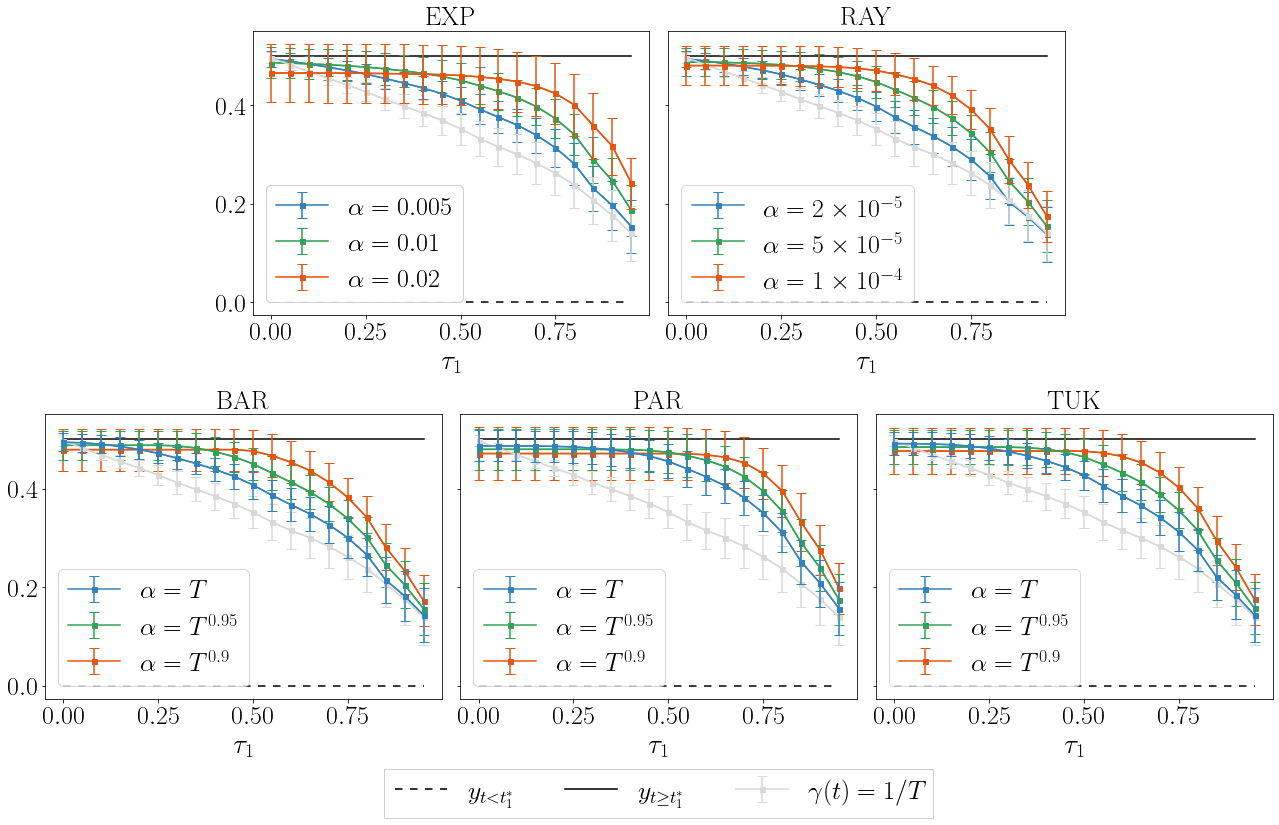

In [20]:
fig = plt.figure(figsize=(22,16))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax1.plot(tau, y2, color='black')
ax1.plot(tau, rnn_exp_preds_mean_small[:,0], color=cmap(0))
l1 = ax1.errorbar(tau, rnn_exp_preds_mean_small[:,0], rnn_exp_preds_std_small[:,0], capsize=5, color=cmap(0), marker='s', ms=5, label = r'$\alpha=0.005$')
ax1.plot(tau, rnn_exp_preds_mean[:,0], color=cmap(8))
l2 = ax1.errorbar(tau, rnn_exp_preds_mean[:,0], rnn_exp_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=0.01$')
ax1.plot(tau, rnn_exp_preds_mean_large[:,0], color=cmap(4))
l3 = ax1.errorbar(tau, rnn_exp_preds_mean_large[:,0], rnn_exp_preds_std_large[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3, label = r'$\alpha=0.02$')
ax1.plot(tau, rnn_preds_mean[:,0], color=cmap(19))
l = ax1.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax1.set_title('EXP')
ax1.set_xlabel(r'$\tau_1$')
legend1 = ax1.legend(handles=[l1,l2,l3], loc='lower left')
ax1.add_artist(legend1)

ax2.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax2.plot(tau, y2, color='black')
ax2.plot(tau, rnn_ray_preds_mean_small[:,0], color=cmap(0))
l1 = ax2.errorbar(tau, rnn_ray_preds_mean_small[:,0], rnn_ray_preds_std_small[:,0], capsize=5, color=cmap(0), marker='s', ms=5, label = r'$\alpha=2\times10^{-5}$')
ax2.plot(tau, rnn_ray_preds_mean[:,0], color=cmap(8))
l2 = ax2.errorbar(tau, rnn_ray_preds_mean[:,0], rnn_ray_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=5\times10^{-5}$')
ax2.plot(tau, rnn_ray_preds_mean_large[:,0], color=cmap(4))
l3 = ax2.errorbar(tau, rnn_ray_preds_mean_large[:,0], rnn_ray_preds_std_large[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3, label = r'$\alpha=1\times10^{-4}$')
ax2.plot(tau, rnn_preds_mean[:,0], color=cmap(19))
ax2.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax2.set_title('RAY')
ax2.set_xlabel(r'$\tau_1$')
ax2.legend(handles=[l1,l2,l3], loc='lower left')

ax3.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax3.plot(tau, y2, color='black')
ax3.plot(tau, rnn_bar_preds_mean_small[:,0], color=cmap(4))
l3 = ax3.errorbar(tau, rnn_bar_preds_mean_small[:,0], rnn_bar_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax3.plot(tau, rnn_bar_preds_mean[:,0], color=cmap(8))
l2 = ax3.errorbar(tau, rnn_bar_preds_mean[:,0], rnn_bar_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax3.plot(tau, rnn_bar_preds_mean_large[:,0], color=cmap(0))
l1 = ax3.errorbar(tau, rnn_bar_preds_mean_large[:,0], rnn_bar_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax3.plot(tau, rnn_preds_mean[:,0], color=cmap(19))
ax3.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax3.set_title('BAR')
ax3.set_xlabel(r'$\tau_1$')
ax3.legend(handles=[l1,l2,l3], loc='lower left')

ax4.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax4.plot(tau, y2, color='black')
ax4.plot(tau, rnn_par_preds_mean_small[:,0], color=cmap(4))
l3 = ax4.errorbar(tau, rnn_par_preds_mean_small[:,0], rnn_par_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax4.plot(tau, rnn_par_preds_mean[:,0], color=cmap(8))
l2 = ax4.errorbar(tau, rnn_par_preds_mean[:,0], rnn_par_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax4.plot(tau, rnn_par_preds_mean_large[:,0], color=cmap(0))
l1 = ax4.errorbar(tau, rnn_par_preds_mean_large[:,0], rnn_par_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax4.plot(tau, rnn_preds_mean[:,0], color=cmap(19))
ax4.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax4.set_title('PAR')
ax4.set_xlabel(r'$\tau_1$')
legend1 = ax4.legend(handles=[l1,l2,l3], loc='lower left')
ax4.add_artist(legend1)

ax5.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax5.plot(tau, y2, color='black')
ax5.plot(tau, rnn_tuk_preds_mean_small[:,0], color=cmap(4))
l3 = ax5.errorbar(tau, rnn_tuk_preds_mean_small[:,0], rnn_tuk_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax5.plot(tau, rnn_tuk_preds_mean[:,0], color=cmap(8))
l2 = ax5.errorbar(tau, rnn_tuk_preds_mean[:,0], rnn_tuk_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax5.plot(tau, rnn_tuk_preds_mean_large[:,0], color=cmap(0))
l1 = ax5.errorbar(tau, rnn_tuk_preds_mean_large[:,0], rnn_tuk_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax5.plot(tau, rnn_preds_mean[:,0], color=cmap(19))
ax5.errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax5.set_title('TUK')
ax5.set_xlabel(r'$\tau_1$')
ax5.legend(handles=[l1,l2,l3], loc='lower left')

fig.subplots_adjust(bottom=0.3, wspace=-0.3)
l1 = mlines.Line2D([], [], color='black', linestyle=(0, (5, 5)))
l2 = mlines.Line2D([], [], color='black')
legend2 = ax4.legend(handles = [l1,l2,l] , labels=[r'$y_{t<t_1^*}$', r'$y_{t\geq t_1^*}$', r'$\gamma(t)=1/T$'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)
ax4.add_artist(legend2)

plt.savefig(path+'BreakLocationDependence_WeightedLoss_RNN_alphas.pdf', bbox_inches='tight')
plt.show()

## LSTM

Load data:

In [21]:
with np.load(path+'Results/Plot_LSTM_preds.npz') as data: # equal weights
    lstm_preds_mean = data['mean']
    lstm_preds_std = data['std']
with np.load(path+'Results/Plot_LSTM_exponential_0.01_preds.npz') as data: # exponential, alpha = 0.01, batch_size = 128
    lstm_exp_preds_mean = data['mean']
    lstm_exp_preds_std = data['std']
with np.load(path+'Results/Plot_LSTM_rayleigh_5e-05_preds.npz') as data: # rayleigh, alpha = 5*10^(-5), batch_size = 128
    lstm_ray_preds_mean = data['mean']
    lstm_ray_preds_std = data['std']
with np.load(path+'Results/Plot_LSTM_bartlett_T0.95_preds.npz') as data: # bartlett, alpha = T^0.95, batch_size = 128
    lstm_bar_preds_mean = data['mean']
    lstm_bar_preds_std = data['std']
with np.load(path+'Results/Plot_LSTM_parzen_T0.95_preds.npz') as data: # parzen, alpha = T^0.95, batch_size = 128
    lstm_par_preds_mean = data['mean']
    lstm_par_preds_std = data['std']
with np.load(path+'Results/Plot_LSTM_tukey-hanning_T0.95_preds.npz') as data: # tukey-hanning, alpha = T^0.95, batch_size = 128
    lstm_tuk_preds_mean = data['mean']
    lstm_tuk_preds_std = data['std']

In [22]:
# varying alpha
# smaller alpha
with np.load(path+'Results/Plot_LSTM_exponential_0.005_preds.npz') as data: # exponential, alpha = 0.005, batch_size = 128
    lstm_exp_preds_mean_small = data['mean']
    lstm_exp_preds_std_small = data['std']
with np.load(path+'Results/Plot_LSTM_rayleigh_2e-05_preds.npz') as data: # rayleigh, alpha = 2*10^(-5), batch_size = 128
#with np.load(path+'Results/Plot_LSTM_rayleigh_1e-05_preds.npz') as data: # rayleigh, alpha = 1*10^(-5), batch_size = 128
    lstm_ray_preds_mean_small = data['mean']
    lstm_ray_preds_std_small = data['std']
with np.load(path+'Results/Plot_LSTM_bartlett_T0.9_preds.npz') as data: # bartlett, alpha = T^0.9, batch_size = 128
    lstm_bar_preds_mean_small = data['mean']
    lstm_bar_preds_std_small = data['std']
with np.load(path+'Results/Plot_LSTM_parzen_T0.9_preds.npz') as data: # parzen, alpha = T^0.9, batch_size = 128
    lstm_par_preds_mean_small = data['mean']
    lstm_par_preds_std_small = data['std']
with np.load(path+'Results/Plot_LSTM_tukey-hanning_T0.9_preds.npz') as data: # tukey-hanning, alpha = T^0.9, batch_size = 128
    lstm_tuk_preds_mean_small = data['mean']
    lstm_tuk_preds_std_small = data['std']
# larger alpha
with np.load(path+'Results/Plot_LSTM_exponential_0.02_preds.npz') as data: # exponential, alpha = 0.02, batch_size = 128
    lstm_exp_preds_mean_large = data['mean']
    lstm_exp_preds_std_large = data['std']
with np.load(path+'Results/Plot_LSTM_rayleigh_0.0001_preds.npz') as data: # rayleigh, alpha = 1*10^(-4), batch_size = 128
    lstm_ray_preds_mean_large = data['mean']
    lstm_ray_preds_std_large = data['std']
with np.load(path+'Results/Plot_LSTM_bartlett_T1_preds.npz') as data: # bartlett, alpha = T^1, batch_size = 128
    lstm_bar_preds_mean_large = data['mean']
    lstm_bar_preds_std_large = data['std']
with np.load(path+'Results/Plot_LSTM_parzen_T1_preds.npz') as data: # parzen, alpha = T^1, batch_size = 128
    lstm_par_preds_mean_large = data['mean']
    lstm_par_preds_std_large = data['std']
with np.load(path+'Results/Plot_LSTM_tukey-hanning_T1_preds.npz') as data: # tukey-hanning, alpha = T^1, batch_size = 128
    lstm_tuk_preds_mean_large = data['mean']
    lstm_tuk_preds_std_large = data['std']

Compare weighting schemes

In [13]:
cmap1 = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("tab20c")

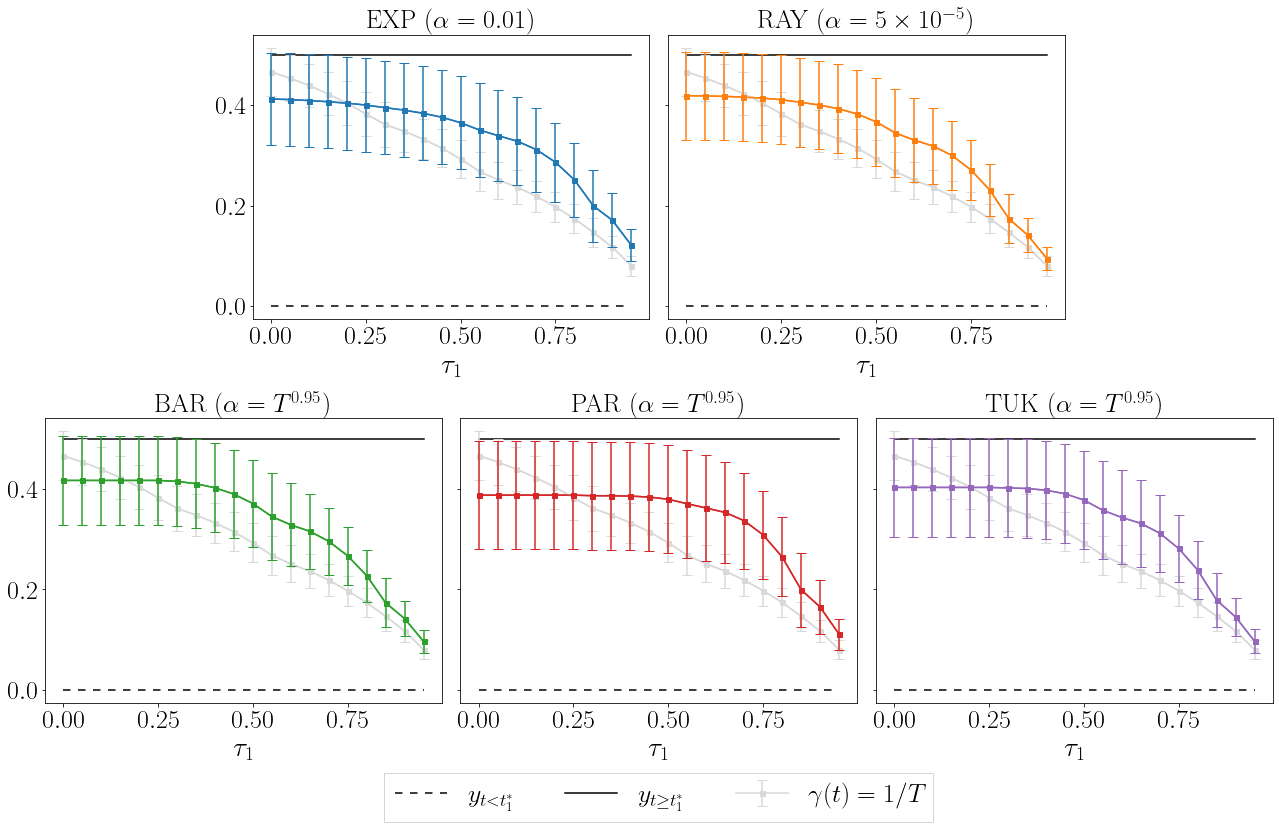

In [14]:
fig = plt.figure(figsize=(22,16))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax1.plot(tau, y2, color='black')
ax1.plot(tau, lstm_exp_preds_mean[:,0], color=cmap1(0))
ax1.errorbar(tau, lstm_exp_preds_mean[:,0], lstm_exp_preds_std[:,0], capsize=5, color=cmap1(0), marker='s', ms=5, zorder=3)
ax1.plot(tau, lstm_preds_mean[:,0], color=cmap2(19))
l3 = ax1.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax1.set_title('EXP ' + r'$(\alpha=0.01)$')
ax1.set_xlabel(r'$\tau_1$')

ax2.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax2.plot(tau, y2, color='black')
ax2.plot(tau, lstm_ray_preds_mean[:,0], color=cmap1(1))
ax2.errorbar(tau, lstm_ray_preds_mean[:,0], lstm_ray_preds_std[:,0], capsize=5, color=cmap1(1), marker='s', ms=5, zorder=3)
ax2.plot(tau, lstm_preds_mean[:,0], color=cmap2(19))
ax2.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax2.set_title('RAY ' + r'$(\alpha=5\times10^{-5})$')
ax2.set_xlabel(r'$\tau_1$')

ax3.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax3.plot(tau, y2, color='black')
ax3.plot(tau, lstm_bar_preds_mean[:,0], color=cmap1(2))
ax3.errorbar(tau, lstm_bar_preds_mean[:,0], lstm_bar_preds_std[:,0], capsize=5, color=cmap1(2), marker='s', ms=5, zorder=3)
ax3.plot(tau, lstm_preds_mean[:,0], color=cmap2(19))
ax3.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax3.set_title('BAR ' + r'$(\alpha=T^{0.95})$')
ax3.set_xlabel(r'$\tau_1$')

ax4.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax4.plot(tau, y2, color='black')
ax4.plot(tau, lstm_par_preds_mean[:,0], color=cmap1(3))
ax4.errorbar(tau, lstm_par_preds_mean[:,0], lstm_par_preds_std[:,0], capsize=5, color=cmap1(3), marker='s', ms=5, zorder=3)
ax4.plot(tau, lstm_preds_mean[:,0], color=cmap2(19))
ax4.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax4.set_title('PAR ' + r'$(\alpha=T^{0.95})$')
ax4.set_xlabel(r'$\tau_1$')

ax5.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax5.plot(tau, y2, color='black')
ax5.plot(tau, lstm_tuk_preds_mean[:,0], color=cmap1(4))
ax5.errorbar(tau, lstm_tuk_preds_mean[:,0], lstm_tuk_preds_std[:,0], capsize=5, color=cmap1(4), marker='s', ms=5, zorder=3)
ax5.plot(tau, lstm_preds_mean[:,0], color=cmap2(19))
ax5.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax5.set_title('TUK ' + r'$(\alpha=T^{0.95})$')
ax5.set_xlabel(r'$\tau_1$')

fig.subplots_adjust(bottom=0.3, wspace=-0.3)
l1 = mlines.Line2D([], [], color='black', linestyle=(0, (5, 5)))
l2 = mlines.Line2D([], [], color='black')
ax4.legend(handles = [l1,l2,l3] , labels=[r'$y_{t<t_1^*}$', r'$y_{t\geq t_1^*}$', r'$\gamma(t)=1/T$'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)

plt.savefig(path+'BreakLocationDependence_WeightedLoss_LSTM.pdf', bbox_inches='tight')
plt.show()

Varying $\alpha$:

In [15]:
cmap = plt.get_cmap("tab20c")

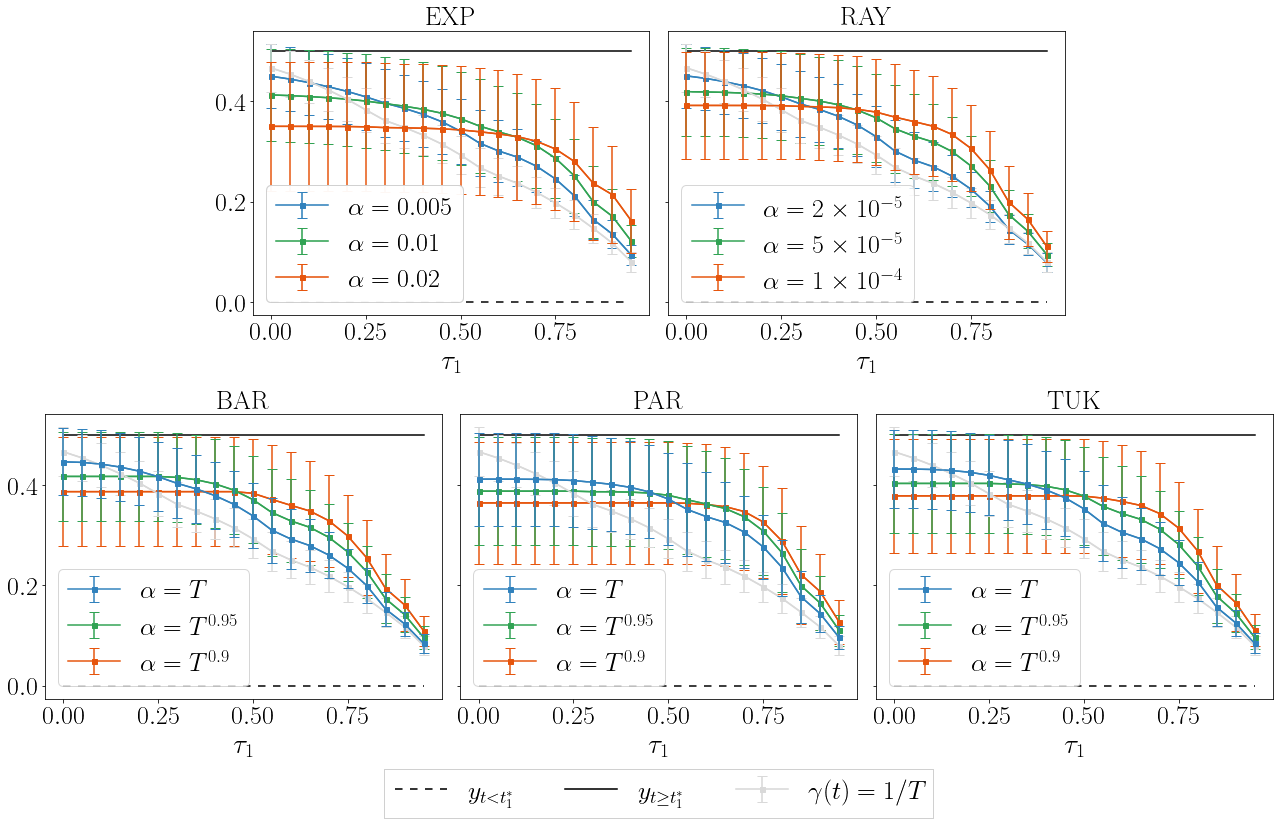

In [23]:
fig = plt.figure(figsize=(22,16))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax1.plot(tau, y2, color='black')
ax1.plot(tau, lstm_exp_preds_mean_small[:,0], color=cmap(0))
l1 = ax1.errorbar(tau, lstm_exp_preds_mean_small[:,0], lstm_exp_preds_std_small[:,0], capsize=5, color=cmap(0), marker='s', ms=5, label = r'$\alpha=0.005$')
ax1.plot(tau, lstm_exp_preds_mean[:,0], color=cmap(8))
l2 = ax1.errorbar(tau, lstm_exp_preds_mean[:,0], lstm_exp_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=0.01$')
ax1.plot(tau, lstm_exp_preds_mean_large[:,0], color=cmap(4))
l3 = ax1.errorbar(tau, lstm_exp_preds_mean_large[:,0], lstm_exp_preds_std_large[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3, label = r'$\alpha=0.02$')
ax1.plot(tau, lstm_preds_mean[:,0], color=cmap(19))
l = ax1.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax1.set_title('EXP')
ax1.set_xlabel(r'$\tau_1$')
legend1 = ax1.legend(handles=[l1,l2,l3], loc='lower left')
ax1.add_artist(legend1)

ax2.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax2.plot(tau, y2, color='black')
ax2.plot(tau, lstm_ray_preds_mean_small[:,0], color=cmap(0))
l1 = ax2.errorbar(tau, lstm_ray_preds_mean_small[:,0], lstm_ray_preds_std_small[:,0], capsize=5, color=cmap(0), marker='s', ms=5, label = r'$\alpha=2\times10^{-5}$')
ax2.plot(tau, lstm_ray_preds_mean[:,0], color=cmap(8))
l2 = ax2.errorbar(tau, lstm_ray_preds_mean[:,0], lstm_ray_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=5\times10^{-5}$')
ax2.plot(tau, lstm_ray_preds_mean_large[:,0], color=cmap(4))
l3 = ax2.errorbar(tau, lstm_ray_preds_mean_large[:,0], lstm_ray_preds_std_large[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3, label = r'$\alpha=1\times10^{-4}$')
ax2.plot(tau, lstm_preds_mean[:,0], color=cmap(19))
ax2.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax2.set_title('RAY')
ax2.set_xlabel(r'$\tau_1$')
ax2.legend(handles=[l1,l2,l3], loc='lower left')

ax3.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax3.plot(tau, y2, color='black')
ax3.plot(tau, lstm_bar_preds_mean_small[:,0], color=cmap(4))
l3 = ax3.errorbar(tau, lstm_bar_preds_mean_small[:,0], lstm_bar_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax3.plot(tau, lstm_bar_preds_mean[:,0], color=cmap(8))
l2 = ax3.errorbar(tau, lstm_bar_preds_mean[:,0], lstm_bar_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax3.plot(tau, lstm_bar_preds_mean_large[:,0], color=cmap(0))
l1 = ax3.errorbar(tau, lstm_bar_preds_mean_large[:,0], lstm_bar_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax3.plot(tau, lstm_preds_mean[:,0], color=cmap(19))
ax3.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax3.set_title('BAR')
ax3.set_xlabel(r'$\tau_1$')
ax3.legend(handles=[l1,l2,l3], loc='lower left')

ax4.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax4.plot(tau, y2, color='black')
ax4.plot(tau, lstm_par_preds_mean_small[:,0], color=cmap(4))
l3 = ax4.errorbar(tau, lstm_par_preds_mean_small[:,0], lstm_par_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax4.plot(tau, lstm_par_preds_mean[:,0], color=cmap(8))
l2 = ax4.errorbar(tau, lstm_par_preds_mean[:,0], lstm_par_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax4.plot(tau, lstm_par_preds_mean_large[:,0], color=cmap(0))
l1 = ax4.errorbar(tau, lstm_par_preds_mean_large[:,0], lstm_par_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax4.plot(tau, lstm_preds_mean[:,0], color=cmap(19))
ax4.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax4.set_title('PAR')
ax4.set_xlabel(r'$\tau_1$')
legend1 = ax4.legend(handles=[l1,l2,l3], loc='lower left')
ax4.add_artist(legend1)

ax5.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax5.plot(tau, y2, color='black')
ax5.plot(tau, lstm_tuk_preds_mean_small[:,0], color=cmap(4))
l3 = ax5.errorbar(tau, lstm_tuk_preds_mean_small[:,0], lstm_tuk_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax5.plot(tau, lstm_tuk_preds_mean[:,0], color=cmap(8))
l2 = ax5.errorbar(tau, lstm_tuk_preds_mean[:,0], lstm_tuk_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax5.plot(tau, lstm_tuk_preds_mean_large[:,0], color=cmap(0))
l1 = ax5.errorbar(tau, lstm_tuk_preds_mean_large[:,0], lstm_tuk_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax5.plot(tau, lstm_preds_mean[:,0], color=cmap(19))
ax5.errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax5.set_title('TUK')
ax5.set_xlabel(r'$\tau_1$')
ax5.legend(handles=[l1,l2,l3], loc='lower left')

fig.subplots_adjust(bottom=0.3, wspace=-0.3)
l1 = mlines.Line2D([], [], color='black', linestyle=(0, (5, 5)))
l2 = mlines.Line2D([], [], color='black')
legend2 = ax4.legend(handles = [l1,l2,l] , labels=[r'$y_{t<t_1^*}$', r'$y_{t\geq t_1^*}$', r'$\gamma(t)=1/T$'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)
ax4.add_artist(legend2)

plt.savefig(path+'BreakLocationDependence_WeightedLoss_LSTM_alphas.pdf', bbox_inches='tight')
plt.show()

## GRU

Load data:

In [5]:
with np.load(path+'Results/Plot_GRU_preds.npz') as data: # equal weights
    gru_preds_mean = data['mean']
    gru_preds_std = data['std']
with np.load(path+'Results/Plot_GRU_exponential_0.01_preds.npz') as data: # exponential, alpha = 0.01, batch_size = 128
    gru_exp_preds_mean = data['mean']
    gru_exp_preds_std = data['std']
with np.load(path+'Results/Plot_GRU_rayleigh_5e-05_preds.npz') as data: # rayleigh, alpha = 5*10^(-5), batch_size = 128
    gru_ray_preds_mean = data['mean']
    gru_ray_preds_std = data['std']
with np.load(path+'Results/Plot_GRU_bartlett_T0.95_preds.npz') as data: # bartlett, alpha = T^0.95, batch_size = 128
    gru_bar_preds_mean = data['mean']
    gru_bar_preds_std = data['std']
with np.load(path+'Results/Plot_GRU_parzen_T0.95_preds.npz') as data: # parzen, alpha = T^0.95, batch_size = 128
    gru_par_preds_mean = data['mean']
    gru_par_preds_std = data['std']
with np.load(path+'Results/Plot_GRU_tukey-hanning_T0.95_preds.npz') as data: # tukey-hanning, alpha = T^0.95, batch_size = 128
    gru_tuk_preds_mean = data['mean']
    gru_tuk_preds_std = data['std']

In [6]:
# varying alpha
# smaller alpha
with np.load(path+'Results/Plot_GRU_exponential_0.005_preds.npz') as data: # exponential, alpha = 0.005, batch_size = 128
    gru_exp_preds_mean_small = data['mean']
    gru_exp_preds_std_small = data['std']
with np.load(path+'Results/Plot_GRU_rayleigh_2e-05_preds.npz') as data: # rayleigh, alpha = 2*10^(-5), batch_size = 128
#with np.load(path+'Results/Plot_GRU_rayleigh_1e-05_preds.npz') as data: # rayleigh, alpha = 1*10^(-5), batch_size = 128
    gru_ray_preds_mean_small = data['mean']
    gru_ray_preds_std_small = data['std']
with np.load(path+'Results/Plot_GRU_bartlett_T0.9_preds.npz') as data: # bartlett, alpha = T^0.9, batch_size = 128
    gru_bar_preds_mean_small = data['mean']
    gru_bar_preds_std_small = data['std']
with np.load(path+'Results/Plot_GRU_parzen_T0.9_preds.npz') as data: # parzen, alpha = T^0.9, batch_size = 128
    gru_par_preds_mean_small = data['mean']
    gru_par_preds_std_small = data['std']
with np.load(path+'Results/Plot_GRU_tukey-hanning_T0.9_preds.npz') as data: # tukey-hanning, alpha = T^0.9, batch_size = 128
    gru_tuk_preds_mean_small = data['mean']
    gru_tuk_preds_std_small = data['std']
# larger alpha
with np.load(path+'Results/Plot_GRU_exponential_0.02_preds.npz') as data: # exponential, alpha = 0.02, batch_size = 128
    gru_exp_preds_mean_large = data['mean']
    gru_exp_preds_std_large = data['std']
with np.load(path+'Results/Plot_GRU_rayleigh_0.0001_preds.npz') as data: # rayleigh, alpha = 1*10^(-4), batch_size = 128
    gru_ray_preds_mean_large = data['mean']
    gru_ray_preds_std_large = data['std']
with np.load(path+'Results/Plot_GRU_bartlett_T1_preds.npz') as data: # bartlett, alpha = T^1, batch_size = 128
    gru_bar_preds_mean_large = data['mean']
    gru_bar_preds_std_large = data['std']
with np.load(path+'Results/Plot_GRU_parzen_T1_preds.npz') as data: # parzen, alpha = T^1, batch_size = 128
    gru_par_preds_mean_large = data['mean']
    gru_par_preds_std_large = data['std']
with np.load(path+'Results/Plot_GRU_tukey-hanning_T1_preds.npz') as data: # tukey-hanning, alpha = T^1, batch_size = 128
    gru_tuk_preds_mean_large = data['mean']
    gru_tuk_preds_std_large = data['std']

Comparing weighting schemes:

In [7]:
cmap1 = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("tab20c")

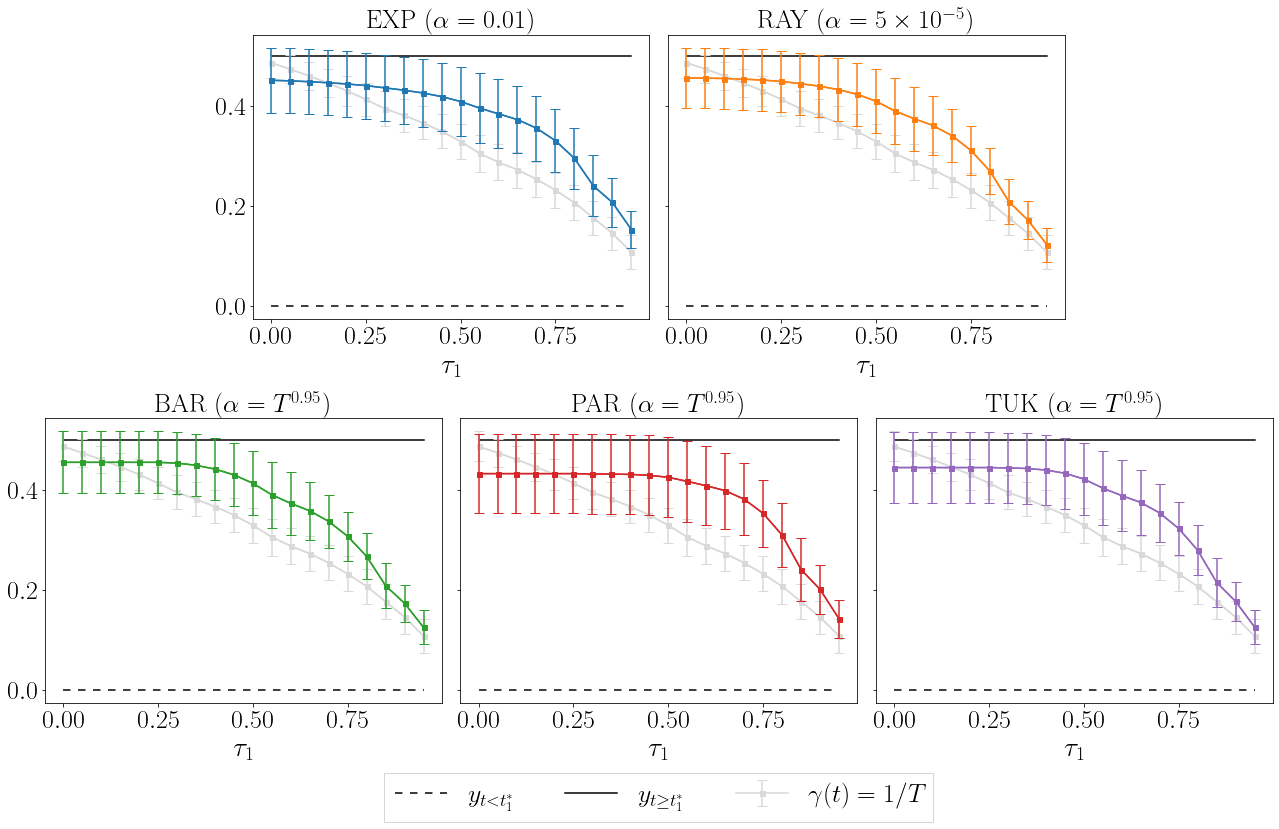

In [12]:
fig = plt.figure(figsize=(22,16))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax1.plot(tau, y2, color='black')
ax1.plot(tau, gru_exp_preds_mean[:,0], color=cmap1(0))
ax1.errorbar(tau, gru_exp_preds_mean[:,0], gru_exp_preds_std[:,0], capsize=5, color=cmap1(0), marker='s', ms=5, zorder=3)
ax1.plot(tau, gru_preds_mean[:,0], color=cmap2(19))
l3 = ax1.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax1.set_title('EXP ' + r'$(\alpha=0.01)$')
ax1.set_xlabel(r'$\tau_1$')

ax2.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax2.plot(tau, y2, color='black')
ax2.plot(tau, gru_ray_preds_mean[:,0], color=cmap1(1))
ax2.errorbar(tau, gru_ray_preds_mean[:,0], gru_ray_preds_std[:,0], capsize=5, color=cmap1(1), marker='s', ms=5, zorder=3)
ax2.plot(tau, gru_preds_mean[:,0], color=cmap2(19))
ax2.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax2.set_title('RAY ' + r'$(\alpha=5\times10^{-5})$')
ax2.set_xlabel(r'$\tau_1$')

ax3.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax3.plot(tau, y2, color='black')
ax3.plot(tau, gru_bar_preds_mean[:,0], color=cmap1(2))
ax3.errorbar(tau, gru_bar_preds_mean[:,0], gru_bar_preds_std[:,0], capsize=5, color=cmap1(2), marker='s', ms=5, zorder=3)
ax3.plot(tau, gru_preds_mean[:,0], color=cmap2(19))
ax3.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax3.set_title('BAR ' + r'$(\alpha=T^{0.95})$')
ax3.set_xlabel(r'$\tau_1$')

ax4.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax4.plot(tau, y2, color='black')
ax4.plot(tau, gru_par_preds_mean[:,0], color=cmap1(3))
ax4.errorbar(tau, gru_par_preds_mean[:,0], gru_par_preds_std[:,0], capsize=5, color=cmap1(3), marker='s', ms=5, zorder=3)
ax4.plot(tau, gru_preds_mean[:,0], color=cmap2(19))
ax4.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax4.set_title('PAR ' + r'$(\alpha=T^{0.95})$')
ax4.set_xlabel(r'$\tau_1$')

ax5.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax5.plot(tau, y2, color='black')
ax5.plot(tau, gru_tuk_preds_mean[:,0], color=cmap1(4))
ax5.errorbar(tau, gru_tuk_preds_mean[:,0], gru_tuk_preds_std[:,0], capsize=5, color=cmap1(4), marker='s', ms=5, zorder=3)
ax5.plot(tau, gru_preds_mean[:,0], color=cmap2(19))
ax5.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap2(19), marker='s', ms=5)
ax5.set_title('TUK ' + r'$(\alpha=T^{0.95})$')
ax5.set_xlabel(r'$\tau_1$')

fig.subplots_adjust(bottom=0.3, wspace=-0.3)
l1 = mlines.Line2D([], [], color='black', linestyle=(0, (5, 5)))
l2 = mlines.Line2D([], [], color='black')
ax4.legend(handles = [l1,l2,l3] , labels=[r'$y_{t<t_1^*}$', r'$y_{t\geq t_1^*}$', r'$\gamma(t)=1/T$'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)

plt.savefig(path+'BreakLocationDependence_WeightedLoss_GRU.pdf', bbox_inches='tight')
plt.show()

Varying $\alpha$:

In [13]:
cmap = plt.get_cmap("tab20c")

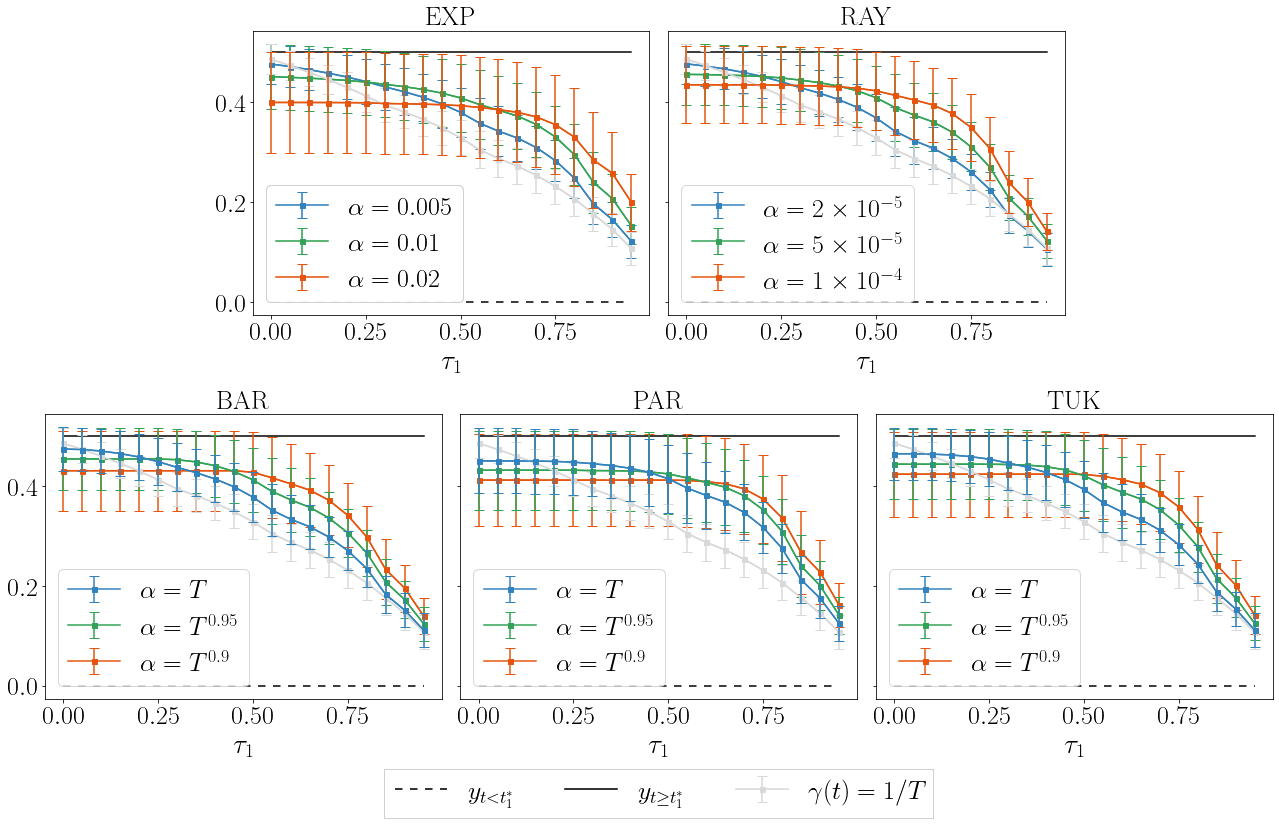

In [24]:
fig = plt.figure(figsize=(22,16))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax1.plot(tau, y2, color='black')
ax1.plot(tau, gru_exp_preds_mean_small[:,0], color=cmap(0))
l1 = ax1.errorbar(tau, gru_exp_preds_mean_small[:,0], gru_exp_preds_std_small[:,0], capsize=5, color=cmap(0), marker='s', ms=5, label = r'$\alpha=0.005$')
ax1.plot(tau, gru_exp_preds_mean[:,0], color=cmap(8))
l2 = ax1.errorbar(tau, gru_exp_preds_mean[:,0], gru_exp_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=0.01$')
ax1.plot(tau, gru_exp_preds_mean_large[:,0], color=cmap(4))
l3 = ax1.errorbar(tau, gru_exp_preds_mean_large[:,0], gru_exp_preds_std_large[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3, label = r'$\alpha=0.02$')
ax1.plot(tau, gru_preds_mean[:,0], color=cmap(19))
l = ax1.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax1.set_title('EXP')
ax1.set_xlabel(r'$\tau_1$')
legend1 = ax1.legend(handles=[l1,l2,l3], loc='lower left')
ax1.add_artist(legend1)

ax2.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax2.plot(tau, y2, color='black')
ax2.plot(tau, gru_ray_preds_mean_small[:,0], color=cmap(0))
l1 = ax2.errorbar(tau, gru_ray_preds_mean_small[:,0], gru_ray_preds_std_small[:,0], capsize=5, color=cmap(0), marker='s', ms=5, label = r'$\alpha=2\times10^{-5}$')
ax2.plot(tau, gru_ray_preds_mean[:,0], color=cmap(8))
l2 = ax2.errorbar(tau, gru_ray_preds_mean[:,0], gru_ray_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=5\times10^{-5}$')
ax2.plot(tau, gru_ray_preds_mean_large[:,0], color=cmap(4))
l3 = ax2.errorbar(tau, gru_ray_preds_mean_large[:,0], gru_ray_preds_std_large[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3, label = r'$\alpha=1\times10^{-4}$')
ax2.plot(tau, gru_preds_mean[:,0], color=cmap(19))
ax2.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax2.set_title('RAY')
ax2.set_xlabel(r'$\tau_1$')
ax2.legend(handles=[l1,l2,l3], loc='lower left')

ax3.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax3.plot(tau, y2, color='black')
ax3.plot(tau, gru_bar_preds_mean_small[:,0], color=cmap(4))
l3 = ax3.errorbar(tau, gru_bar_preds_mean_small[:,0], gru_bar_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax3.plot(tau, gru_bar_preds_mean[:,0], color=cmap(8))
l2 = ax3.errorbar(tau, gru_bar_preds_mean[:,0], gru_bar_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax3.plot(tau, gru_bar_preds_mean_large[:,0], color=cmap(0))
l1 = ax3.errorbar(tau, gru_bar_preds_mean_large[:,0], gru_bar_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax3.plot(tau, gru_preds_mean[:,0], color=cmap(19))
ax3.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax3.set_title('BAR')
ax3.set_xlabel(r'$\tau_1$')
ax3.legend(handles=[l1,l2,l3], loc='lower left')

ax4.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax4.plot(tau, y2, color='black')
ax4.plot(tau, gru_par_preds_mean_small[:,0], color=cmap(4))
l3 = ax4.errorbar(tau, gru_par_preds_mean_small[:,0], gru_par_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax4.plot(tau, gru_par_preds_mean[:,0], color=cmap(8))
l2 = ax4.errorbar(tau, gru_par_preds_mean[:,0], gru_par_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax4.plot(tau, gru_par_preds_mean_large[:,0], color=cmap(0))
l1 = ax4.errorbar(tau, gru_par_preds_mean_large[:,0], gru_par_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax4.plot(tau, gru_preds_mean[:,0], color=cmap(19))
ax4.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax4.set_title('PAR')
ax4.set_xlabel(r'$\tau_1$')
legend1 = ax4.legend(handles=[l1,l2,l3], loc='lower left')
ax4.add_artist(legend1)

ax5.plot(tau, y1, color='black', linestyle=(0, (5, 5)))
ax5.plot(tau, y2, color='black')
ax5.plot(tau, gru_tuk_preds_mean_small[:,0], color=cmap(4))
l3 = ax5.errorbar(tau, gru_tuk_preds_mean_small[:,0], gru_tuk_preds_std_small[:,0], capsize=5, color=cmap(4), marker='s', ms=5, label = r'$\alpha=T^{0.9}$')
ax5.plot(tau, gru_tuk_preds_mean[:,0], color=cmap(8))
l2 = ax5.errorbar(tau, gru_tuk_preds_mean[:,0], gru_tuk_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, label = r'$\alpha=T^{0.95}$')
ax5.plot(tau, gru_tuk_preds_mean_large[:,0], color=cmap(0))
l1 = ax5.errorbar(tau, gru_tuk_preds_mean_large[:,0], gru_tuk_preds_std_large[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3, label = r'$\alpha=T$')
ax5.plot(tau, gru_preds_mean[:,0], color=cmap(19))
ax5.errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax5.set_title('TUK')
ax5.set_xlabel(r'$\tau_1$')
ax5.legend(handles=[l1,l2,l3], loc='lower left')

fig.subplots_adjust(bottom=0.3, wspace=-0.3)
l1 = mlines.Line2D([], [], color='black', linestyle=(0, (5, 5)))
l2 = mlines.Line2D([], [], color='black')
legend2 = ax4.legend(handles = [l1,l2,l] , labels=[r'$y_{t<t_1^*}$', r'$y_{t\geq t_1^*}$', r'$\gamma(t)=1/T$'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)
ax4.add_artist(legend2)

plt.savefig(path+'BreakLocationDependence_WeightedLoss_GRU_alphas.pdf', bbox_inches='tight')
plt.show()